In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#df = pd.read_csv("../src/estaticos_market.csv")
#df = df.drop(['Unnamed: 0'], axis=1)

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = "https://drive.google.com/open?id=1wt1GXnB8UR2iD7SFrkv3zvmd6V6R0SFy" #shareble link do drive
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Cópia de estaticos_market.csv')  

df = pd.read_csv('Cópia de estaticos_market.csv', sep=',', decimal='.', encoding = "UTF-8")
df = df.drop(['Unnamed: 0'], axis=1)


KeyboardInterrupt: ignored

In [0]:
df.head(5)

NameError: ignored

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [0]:
df.iloc[0]

id                                               a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849
fl_matriz                                        True                                                            
de_natureza_juridica                             SOCIEDADE EMPRESARIA LIMITADA                                   
sg_uf                                            RN                                                              
natureza_juridica_macro                          ENTIDADES EMPRESARIAIS                                          
de_ramo                                          INDUSTRIA DA CONSTRUCAO                                         
setor                                            CONSTRUÇÃO CIVIL                                                
idade_empresa_anos                               14.4575                                                         
idade_emp_cat                                    10 a 15                                

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 181 entries, id to qt_filiais
dtypes: bool(9), float64(144), int64(1), object(27)
memory usage: 610.6+ MB


In [0]:
df.describe()

,idade_empresa_anos,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,nu_meses_rescencia,vl_frota,empsetorcensitariofaixarendapopulacao,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
count,462298.000000,280.000000,176.000000,30684.000000,30684.000000,6590.000000,460371.000000,460371.000000,1760.000000,336.000000,3683.000000,417022.000000,2.419000e+04,318469.000000,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000,3251.000000,195115.000000,145029.000000,6743.000000,0.0,0.0,0.0,0.0,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,4544.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.000000,65391.0,65391.000000,65391.000000,65391.000000,65147.000000,65147.000000,65147.000000,136.000000,136.000000,136.000000,65391.000000,65391.000000,6539

In [0]:
a = df.isna().sum().to_frame("faltantes").join(
df.isnull().sum().to_frame('%')*100/len(df)).round(2)

In [0]:
a = a.sort_values(by=['faltantes'],ascending = False)
print(a.to_string())

                                               faltantes       %
qt_alteracao_socio_total                       462298     100.00
qt_alteracao_socio_90d                         462298     100.00
grau_instrucao_macro_desconhecido              462298     100.00
qt_alteracao_socio_180d                        462298     100.00
qt_alteracao_socio_365d                        462298     100.00
coligada_mais_antiga_baixada                   462162     99.97 
coligada_mais_nova_baixada                     462162     99.97 
idade_media_coligadas_baixadas                 462162     99.97 
vl_total_veiculos_antt                         462122     99.96 
vl_total_tancagem                              462018     99.94 
vl_total_veiculos_antt_grupo                   461962     99.93 
vl_total_tancagem_grupo                        460538     99.62 
grau_instrucao_macro_analfabeto                460414     99.59 
idade_ate_18                                   459392     99.37 
qt_socios_st_suspensa    

In [0]:
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                  'unicos': df.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

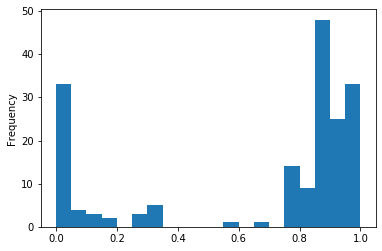

In [0]:
cons.percentual.plot.hist( bins = 20)

In [0]:
df[['nm_micro_regiao','nm_meso_regiao']].describe()

,nm_micro_regiao,nm_meso_regiao
count,403600,403600
unique,73,19
top,MANAUS,CENTRO AMAZONENSE
freq,60008,71469


In [0]:
# 6 estados unicos
df['sg_uf'].unique()

array(['RN', 'PI', 'AM', 'MA', 'RO', 'AC'], dtype=object)

In [0]:
# matrizes em todos os estados
df['sg_uf_matriz'].unique()

array(['RN', 'PI', 'AM', 'MA', 'RO', 'AC', 'DF', nan, 'CE', 'PB', 'SP',
       'PR', 'ES', 'PE', 'MG', 'RJ', 'RS', 'GO', 'SC', 'BA', 'MT', 'MS',
       'PA', 'RR', 'TO', 'AP', 'SE', 'AL'], dtype=object)

In [0]:
a[a['%']<10.0]

,faltantes,%
nu_meses_rescencia,45276,9.79
vl_faturamento_estimado_grupo_aux,27513,5.95
vl_faturamento_estimado_aux,27513,5.95
de_faixa_faturamento_estimado_grupo,27513,5.95
de_faixa_faturamento_estimado,27513,5.95
de_saude_rescencia,14851,3.21
de_saude_tributaria,14851,3.21
de_nivel_atividade,11168,2.42
sg_uf_matriz,1939,0.42
fl_passivel_iss,1927,0.42


In [0]:
dfb = a[a['%']<10.0].index.values.astype(str)

In [0]:
# dfb = np.append (dfb, ['id'])
dfb

array(['nu_meses_rescencia', 'vl_faturamento_estimado_grupo_aux',
       'vl_faturamento_estimado_aux',
       'de_faixa_faturamento_estimado_grupo',
       'de_faixa_faturamento_estimado', 'de_saude_rescencia',
       'de_saude_tributaria', 'de_nivel_atividade', 'sg_uf_matriz',
       'fl_passivel_iss', 'setor', 'nm_divisao', 'fl_simples_irregular',
       'nm_segmento', 'vl_total_veiculos_pesados_grupo', 'fl_veiculo',
       'fl_antt', 'fl_spa', 'vl_total_veiculos_leves_grupo',
       'dt_situacao', 'id', 'fl_matriz', 'fl_me', 'de_natureza_juridica',
       'sg_uf', 'natureza_juridica_macro', 'de_ramo',
       'idade_empresa_anos', 'idade_emp_cat', 'fl_sa', 'fl_rm', 'fl_epp',
       'fl_mei', 'fl_ltda', 'fl_st_especial', 'fl_email', 'fl_telefone',
       'qt_filiais'], dtype='<U35')

In [0]:
dfAlterado = df[dfb]

In [0]:
dfAlterado.head()

,nu_meses_rescencia,vl_faturamento_estimado_grupo_aux,vl_faturamento_estimado_aux,de_faixa_faturamento_estimado_grupo,de_faixa_faturamento_estimado,de_saude_rescencia,de_saude_tributaria,de_nivel_atividade,sg_uf_matriz,fl_passivel_iss,setor,nm_divisao,fl_simples_irregular,nm_segmento,vl_total_veiculos_pesados_grupo,fl_veiculo,fl_antt,fl_spa,vl_total_veiculos_leves_grupo,dt_situacao,id,fl_matriz,fl_me,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,idade_empresa_anos,idade_emp_cat,fl_sa,fl_rm,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,qt_filiais
0,23.0,3132172.8,3132172.8,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",ACIMA DE 1 ANO,VERDE,ALTA,RN,True,CONSTRUÇÃO CIVIL,CONSTRUCAO DE EDIFICIOS,False,CONSTRUCAO,0.0,False,False,False,0.0,2005-03-25,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,False,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,14.457534,10 a 15,False,SIM,False,False,False,False,True,True,0
1,9.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ATE 1 ANO,CINZA,BAIXA,PI,True,SERVIÇO,ALIMENTACAO,False,ALOJAMENTO E ALIMENTACAO,0.0,False,False,False,0.0,2017-05-12,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,False,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,1.463014,1 a 5,False,SIM,False,True,False,False,True,True,0
2,26.0,50000.0,50000.0,"ATE R$ 81.000,00","ATE R$ 81.000,00",ACIMA DE 1 ANO,AMARELO,MEDIA,AM,True,SERVIÇO,TRANSPORTE TERRESTRE,False,TRANSPORTE ARMAZENAGEM E CORREIO,0.0,False,False,False,0.0,2011-09-26,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,False,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",7.093151,5 a 10,False,SIM,False,True,False,False,False,True,0
3,26.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ACIMA DE 1 ANO,AMARELO,MEDIA,AM,True,SERVIÇO,REPARACAO E MANUTENCAO DE EQUIPAMENTOS DE INFORMATICA E COMUNICACAO E DE OBJETOS PESSOAIS E DOMESTICOS,False,OUTRAS ATIVIDADES DE SERVICOS,0.0,False,False,False,0.0,2012-04-25,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8c24ac33eb21d4b21ef,True,False,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,6.512329,5 a 10,False,SIM,False,False,False,False,True,True,0
4,27.0,210000.0,210000.0,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",ACIMA DE 1 ANO,VERDE,ALTA,RN,True,SERVIÇO,SERVICOS DE ARQUITETURA E ENGENHARIA TESTES E ANALISES TECNICAS,False,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,0.0,False,False,False,0.0,2015-08-17,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4b102c769f7611ab29f,True,False,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",3.200000,1 a 5,False,SIM,False,False,False,False,True,True,0


In [0]:
# dfAlterado.to_csv("Mercado_1corte_dados_faltantes.csv")

In [0]:
#dfAlterado = pd.read_csv("Mercado_1corte_dados_faltantes.csv")

In [0]:
dfAlterado['setor'].unique() #fazer dummy disso

array(['CONSTRUÇÃO CIVIL', 'SERVIÇO', 'INDUSTRIA', 'COMERCIO',
       'AGROPECUARIA', nan], dtype=object)

In [0]:
dfAlterado['setor'] = dfAlterado['setor'].fillna("OUTRO_setor")
dfAlterado['nm_divisao'] = dfAlterado['nm_divisao'].fillna("OUTROS_nm_divisao")
dfAlterado['nm_segmento'] = dfAlterado['nm_segmento'].fillna("OUTROS_nm_segmento")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
dummyCategoricas = []

In [0]:
dummyCategoricas.append(pd.get_dummies(dfAlterado['sg_uf']))

dummyCategoricas.append(pd.get_dummies(dfAlterado['de_ramo']))
dummyCategoricas.append(pd.get_dummies(dfAlterado['setor']))

dummyCategoricas.append(pd.get_dummies(dfAlterado['nm_divisao']))
dummyCategoricas.append(pd.get_dummies(dfAlterado['nm_segmento']))

In [0]:
dfAlterado = dfAlterado.drop('fl_matriz', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('idade_emp_cat', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('dt_situacao', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('fl_email', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('fl_telefone', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('fl_passivel_iss', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('fl_spa', axis =1)

In [0]:
dfAlterado = dfAlterado.drop('fl_simples_irregular', axis =1)

In [0]:
dfAlterado['fl_antt'] = dfAlterado['fl_antt'].fillna(False)

In [0]:
dfAlterado['fl_veiculo'] = dfAlterado['fl_veiculo'].fillna(False)

In [0]:
dfAlterado['fl_rm'] = [1 if i=='SIM' else 0 for i in dfAlterado['fl_rm']]
dfAlterado['fl_antt'] = [1 if i== True else 0 for i in dfAlterado['fl_antt']]
dfAlterado['fl_veiculo'] = [1 if i== True else 0 for i in dfAlterado['fl_veiculo']]

In [0]:
dfAlterado = dfAlterado.drop('vl_total_veiculos_pesados_grupo', axis =1)
dfAlterado = dfAlterado.drop('vl_total_veiculos_leves_grupo', axis =1)

In [0]:
dfAlterado['de_saude_tributaria'] = dfAlterado['de_saude_tributaria'].fillna("VERDE")

In [0]:
saudeTributariaDict = {'VERDE':5,
                      'AZUL':4,
                      'AMARELO':3,
                      'LARANJA':2,
                      'VERMELHO':1,
                      'CINZA':0}

In [0]:
dfAlterado['de_saude_tributaria'] = [saudeTributariaDict[i] for i in dfAlterado['de_saude_tributaria']]

In [0]:
# de_saude_rescencia: nao usamos este atributo apenas o usamos para imputar o atributo "de_saude_tributaria" 
a = dfAlterado.query("(de_saude_rescencia != de_saude_rescencia)")['de_saude_tributaria']
indexToSet = a.index.to_list()

In [0]:
len(indexToSet)

14851

In [0]:
for i in indexToSet:
  dfAlterado.iloc[i, dfAlterado.columns.get_loc('de_saude_tributaria')] = 0

In [0]:
dfAlterado['de_nivel_atividade'] = dfAlterado['de_nivel_atividade'].fillna("MEDIA") #moda

In [0]:
dfAlterado['nu_meses_rescencia'] = dfAlterado['nu_meses_rescencia'].fillna(0)
dfAlterado['vl_faturamento_estimado_grupo_aux'] = dfAlterado['vl_faturamento_estimado_grupo_aux'].fillna(dfAlterado['vl_faturamento_estimado_grupo_aux'].mean())
dfAlterado['vl_faturamento_estimado_aux'] = dfAlterado['vl_faturamento_estimado_aux'].fillna(dfAlterado['vl_faturamento_estimado_aux'].mean())




In [0]:
for i in dummyCategoricas:
    dfAlterado = pd.concat([dfAlterado,i],axis=1)

In [0]:
floatList = dfAlterado.select_dtypes(include=['float64']).columns


In [0]:
for i in dfAlterado.select_dtypes(include=['bool']).columns:
  dfAlterado[i] = [1 if i== True else 0 for i in dfAlterado[i]]

In [0]:
dropList = ['de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'nm_divisao', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_rescencia', 'de_nivel_atividade',
       'de_faixa_faturamento_estimado', 'de_faixa_faturamento_estimado_grupo']

dfAlterado = dfAlterado.drop(labels=dropList,axis = 1)

In [0]:
# dfAlterado.dtypes

In [0]:
#Verificando mudancas
cons = pd.DataFrame({'colunas' : dfAlterado.columns,
                    'tipo': dfAlterado.dtypes,
                    'missing' : dfAlterado.isna().sum(),
                    'size' : dfAlterado.shape[0],
                  'unicos': dfAlterado.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)
cons.head(200)

,colunas,tipo,missing,size,unicos,percentual
nu_meses_rescencia,nu_meses_rescencia,float64,0,462298,51,0.0
vl_faturamento_estimado_grupo_aux,vl_faturamento_estimado_grupo_aux,float64,0,462298,6795,0.0
vl_faturamento_estimado_aux,vl_faturamento_estimado_aux,float64,0,462298,1921,0.0
de_saude_tributaria,de_saude_tributaria,int64,0,462298,6,0.0
fl_veiculo,fl_veiculo,int64,0,462298,2,0.0
fl_antt,fl_antt,int64,0,462298,2,0.0
id,id,object,0,462298,462298,0.0
fl_me,fl_me,int64,0,462298,2,0.0
idade_empresa_anos,idade_empresa_anos,float64,0,462298,14198,0.0
fl_sa,fl_sa,int64,0,462298,2,0.0


In [0]:
dfAlterado.shape

(462298, 171)

In [0]:
# dfAlterado.to_csv("Mercado_Formatado_certinho.csv")

In [0]:
# scaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
floatList = list(dfAlterado.select_dtypes(include=['float64']).columns)
floatList.append('de_saude_tributaria')

In [0]:
floatList

['nu_meses_rescencia',
 'vl_faturamento_estimado_grupo_aux',
 'vl_faturamento_estimado_aux',
 'idade_empresa_anos',
 'de_saude_tributaria']

In [0]:
scaler = MinMaxScaler()
dfAlterado[floatList] = scaler.fit_transform(dfAlterado[floatList])

In [0]:
dfAlterado.to_csv("Mercado_Formatado_Final.csv")